# View from browser
(tutorial:view_from_web)=

Last step: Now that we parked our data "on the cloud",
we may want to validate the metadata and we *definitely* want to visualize it in a viewer of our choice.

## Locally

The easier choice, for the sake of simplicity, is to view the data from our local machine.
This is helpful if uploading to S3 didn't work or access to such resources is limited.
Since many ome-zarr viewers rely on browser functionality,
we need to somehow create a server that can provide the data to the browser.
For a one-size-fits-all solution, we can use the `http-server` packge from node.js.
If you don't have `npm` installed, please refer to the [installation instructions](https://docs.npmjs.com/downloading-and-installing-node-js-and-npm).

Once that is done, install http-server like this:

```bash
npm install -g http-server
```

Then, spin up your server in the directory where your `ome.zarr` is located:

```bash
http-server --cors
```

You should see output like this:

```
http-server version: 14.1.1

http-server settings:
CORS: true
Cache: 3600 seconds
Connection Timeout: 120 seconds
Directory Listings: visible
AutoIndex: visible
Serve GZIP Files: false
Serve Brotli Files: false
Default File Extension: none

Available on:
  http://192.168.178.64:8080
  http://192.168.178.62:8080
  http://127.0.0.1:8080
```

Navigate to one of the provided URLS in your browser, and you should see a file listing like this:

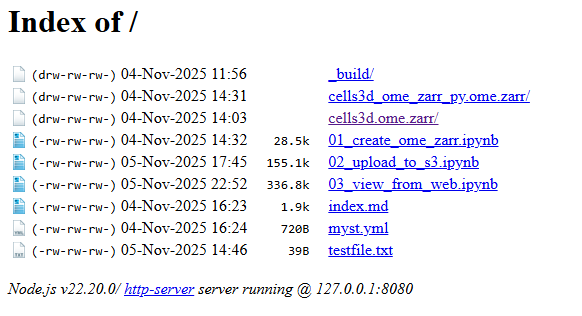

### Exercise: validation

All ome-zarr data on the cloud can be validated using the [ome-ngff-validator](https://ome.github.io/ome-ngff-validator/).
To use it, simply concatenate the URL of your data to the validator URL from the following components:

- Validator URL: https://ome.github.io/ome-ngff-validator/
- S3 URL: local file server URL (e.g., http://127.0.0.1:8080)
- object name: cells3d.ome.zarr

Full URL to validate:
`<Validator URL>?source=<URL>/cells3d.ome.zarr`

```{hint}
If it doesn't work, try the other IP addresses provided by `http-server`.
```

Try it! If it works, you should see something like this:

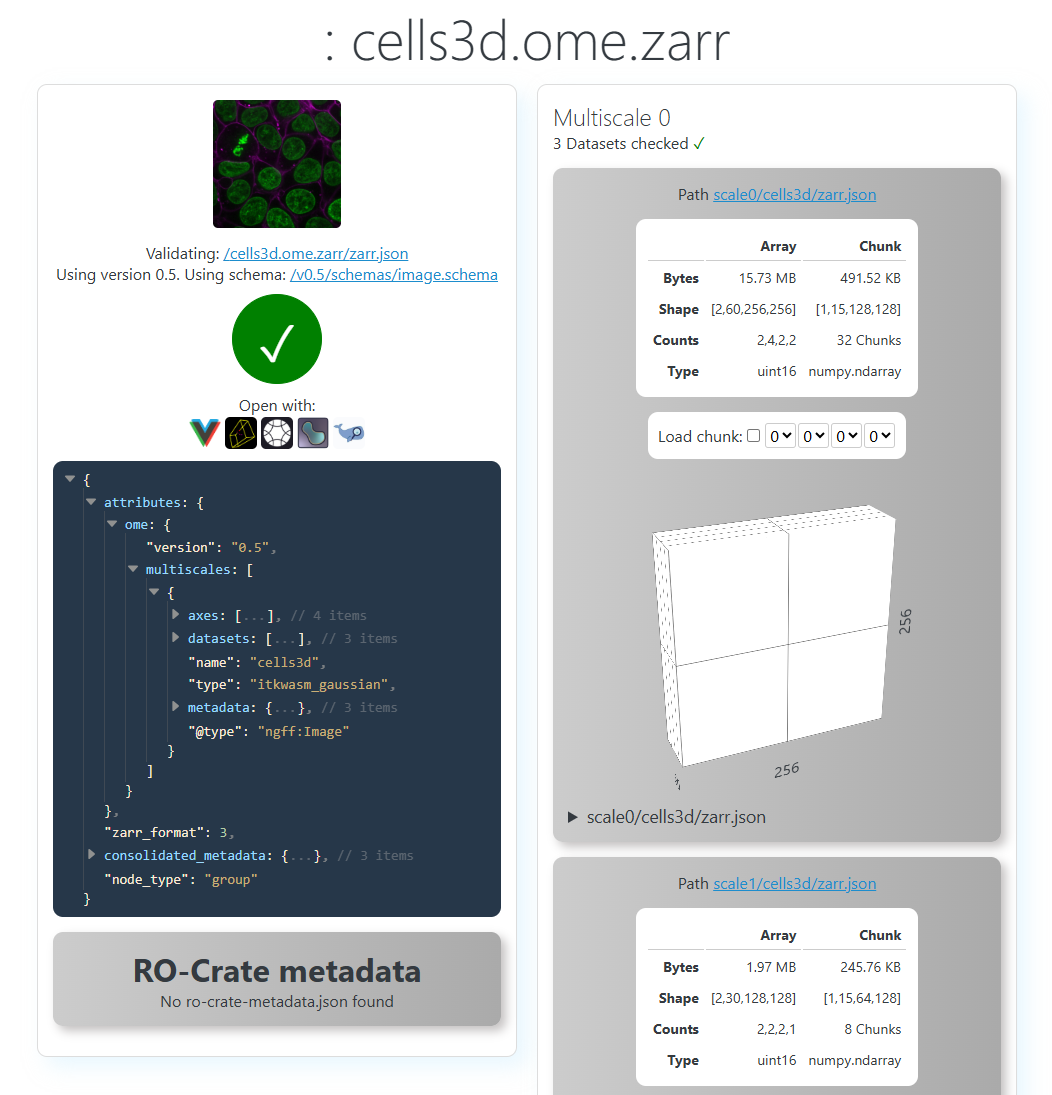

## Visualization - locally, but in browser

From the validator you can directly launch a number of different viewers,
such as vizarr, neuroglancer or the Allen Voll-E viewer.
Simply follow the icons on the ome-ngff-validator page to launch the viewer of your choice.

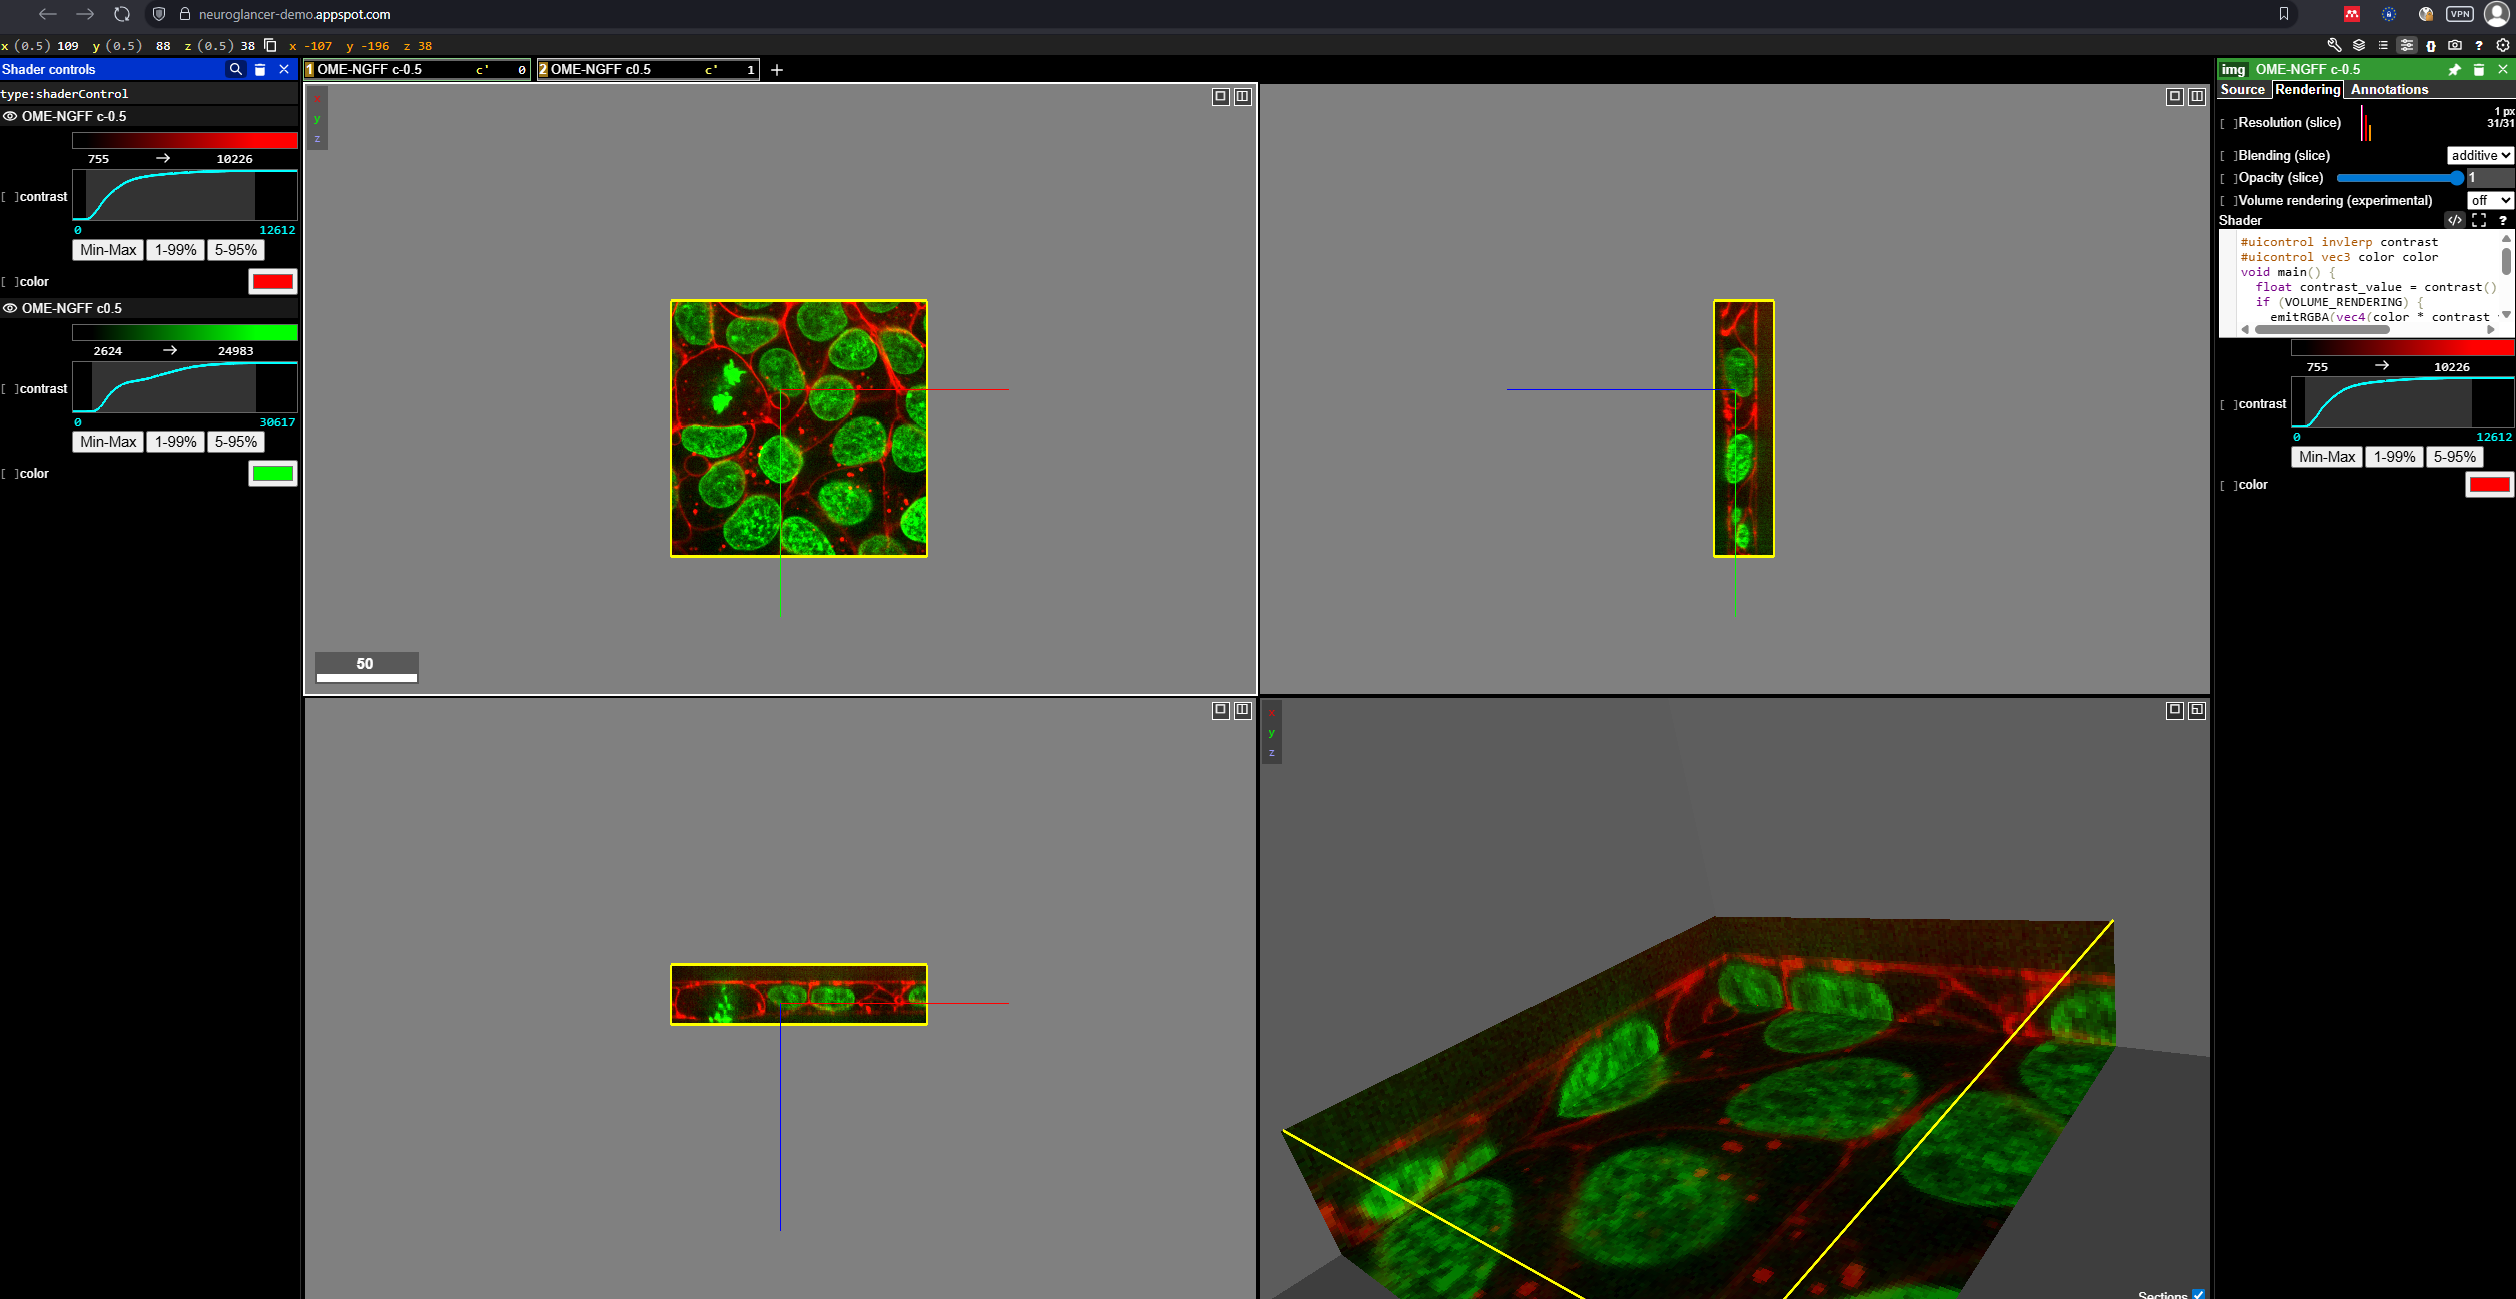

## Visualization in napari

Since you are working locally anyway, you can also visualize the data in napari.
Make sure you have all the necessary dependencies installed as per the instructions in the [main page](tutorial:main).

You can then simply view your data like this:

In [1]:
import napari
import napari_ome_zarr

In [3]:
viewer = napari.Viewer()

In [4]:
viewer.open('cells3d.ome.zarr', plugin='napari-ome-zarr')

[<Image layer 'cells3d' at 0x1512683fb00>,
 <Image layer 'cells3d [1]' at 0x151274c3b00>]

One cool thing is, that while napari doesn't run in the browser,
you can still point napari to a resource on the web, such as your local http-server.

In [5]:
viewer.layers.clear()

### Exercise: Load from local file server

Use napari to load the ome-zarr data from your local http-server. Simply add the correct URL below and open it.

In [ ]:
url = "your-url-here"
viewer.open(url, plugin='napari-ome-zarr')

## From web

Since we just uploaded some ome-zarr data to an S3 storage of our own,
of course we want to do the same visualization from the web!

One thing we need to setcorrectly first: Permissions

### Permissions

A big advantage of using S3 storage is the ability to share data with others.
For classic file storage, there are often limited options to set up granular access permissions.
However, resources on the web allow for much more flexibility.

By default, the dataset we just uploaded is private, meaning only we can access it.
We need to set its access level to public and read-only.
For this, we need the `minio` client again:

```bash
mc anonymous set download halfway_i2k/<bucket_name>
```


### Exercise: Validate
Let's use the ome-ngff validator as a starting point again.

The URL to use is a bit different as per the host institution's guidelines. These may be slightly different for every hoster.
The URL can be composed from the following components:

- Validator URL: https://ome.github.io/ome-ngff-validator/
- S3 URL: `s3.zih.tu-dresden.de/joso140h:<bucket-name>` (replace `<bucket-name>` with your actual bucket name)
- object name: cells3d.ome.zarr

Try it out by concatenating these components like before!

```{hint}
If you encounter a `CORS` error messge, reach out to the course instructor for help.
```